In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(48895, 16)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

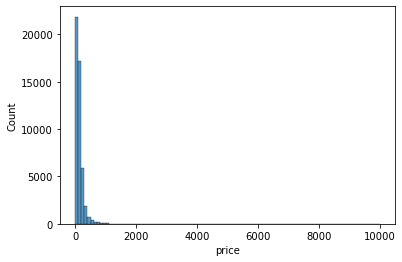

In [11]:
sns.histplot(data=df, x='price', binwidth=100)

In [12]:
df = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
         'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

#### Question 1

In [14]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Question 2

In [16]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [20]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [24]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [25]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [29]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [31]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [33]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [34]:
del df_train['price']
del df_val['price']
del df_test['price']

#### Question 3

In [54]:
def prepare_X(df, fill):
    df_num = df.copy()
    if fill == 'zero':
        df_num = df_num.fillna(0)
    elif fill == 'mean':
        mean = df_num.reviews_per_month.mean()
        df_num = df_num.fillna(mean)
    X = df_num.values
    return X

In [65]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [56]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [58]:
X_train_0 = prepare_X(df_train, 'zero')
w0, w = train_linear_regression(X_train_0, y_train)
X_val_0 = prepare_X(df_val, 'zero')
y_pred_0 = w0 + X_val_0.dot(w)

X_train_mean = prepare_X(df_train, 'mean')
w0, w = train_linear_regression(X_train_mean, y_train)
X_val_mean = prepare_X(df_val, 'mean')
y_pred_mean = w0 + X_val_mean.dot(w)

In [64]:
score_0 = round(rmse(y_val, y_pred_0), 2)
score_mean = round(rmse(y_val, y_pred_mean), 2)
print(f'Score with 0 as fill in = {score_0}')
print(f'Score with mean as fill in = {score_mean}')

Score with 0 as fill in = 0.64
Score with mean as fill in = 0.64


#### Question 4

In [70]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train_0 = prepare_X(df_train, 'zero')
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)

    X_val_0 = prepare_X(df_val, 'zero')
    y_pred_0 = w0 + X_val_0.dot(w)
    score = round(rmse(y_val, y_pred_0), 2)
    
    print(r, w0, score, sep='\t')

0	-419.9126586345957	0.64
1e-06	-419.862715866215	0.64
0.0001	-414.9764926376159	0.64
0.001	-375.27365275360376	0.64
0.01	-191.78384053419813	0.66
0.1	-32.56256054996281	0.68
1	-3.4992168360569003	0.68
5	-0.7033623167239722	0.68
10	-0.3512767588949243	0.68


#### Question 5

In [73]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train_0 = prepare_X(df_train, 'zero')
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)

    X_val_0 = prepare_X(df_val, 'zero')
    y_pred_0 = w0 + X_val_0.dot(w)
    rmse_scores.append(rmse(y_val, y_pred_0))

In [77]:
std_dev = round(np.std(rmse_scores), 3)
std_dev

0.008

#### Question 6

In [79]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
del df_train['price']
del df_val['price']
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

df_test = df.iloc[idx[n_train+n_val:]]
y_test = np.log1p(df_test.price.values)
del df_test['price']

In [80]:
X_full_train_0 = prepare_X(df_full_train, 'zero')
w0, w = train_linear_regression_reg(X_full_train_0, y_full_train, r=0.001)

X_test_0 = prepare_X(df_test, 'zero')
y_pred_0 = w0 + X_test_0.dot(w)

rmse(y_test, y_pred_0)

0.645277134859131